## Importing Important Items

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [2]:
movies = pd.read_csv("datasets/TMDB_movie_dataset_v11.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261781 entries, 0 to 1261780
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1261781 non-null  int64  
 1   title                 1261768 non-null  object 
 2   vote_average          1261781 non-null  float64
 3   vote_count            1261781 non-null  int64  
 4   status                1261781 non-null  object 
 5   release_date          1019565 non-null  object 
 6   revenue               1261781 non-null  int64  
 7   runtime               1261781 non-null  int64  
 8   adult                 1261781 non-null  bool   
 9   backdrop_path         325569 non-null   object 
 10  budget                1261781 non-null  int64  
 11  homepage              131719 non-null   object 
 12  imdb_id               632145 non-null   object 
 13  original_language     1261781 non-null  object 
 14  original_title        1261768 non-

In [3]:
cols = ['id','title','release_date','overview','genres','original_language','keywords', 'popularity','status', 'adult','poster_path']
movies[cols].head()

,id,title,release_date,overview,genres,original_language,keywords,popularity,status,adult,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",en,"rescue, mission, dream, airplane, paris, franc...",83.952,Released,False,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",en,"rescue, future, spacecraft, race against time,...",140.241,Released,False,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",en,"joker, sadism, chaos, secret identity, crime f...",130.643,Released,False,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",en,"future, society, culture clash, space travel, ...",79.932,Released,False,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",en,"new york city, superhero, shield, based on com...",98.082,Released,False,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [4]:
movies[cols].isnull().sum()

id                        0
title                    13
release_date         242216
overview             273504
genres               530429
original_language         0
keywords             934865
popularity                0
status                    0
adult                     0
poster_path          421968
dtype: int64

## Data Cleaning

In [5]:
df = movies[cols]
df.head()

,id,title,release_date,overview,genres,original_language,keywords,popularity,status,adult,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",en,"rescue, mission, dream, airplane, paris, franc...",83.952,Released,False,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",en,"rescue, future, spacecraft, race against time,...",140.241,Released,False,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",en,"joker, sadism, chaos, secret identity, crime f...",130.643,Released,False,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",en,"future, society, culture clash, space travel, ...",79.932,Released,False,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",en,"new york city, superhero, shield, based on com...",98.082,Released,False,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


### Dropping NA values

In [6]:
na_drop = ['release_date','overview','genres','original_language','poster_path']

In [7]:
df = df.dropna(subset=na_drop)
print(df.isna().sum())

print('/n')
print(df['id'].duplicated().sum())

id                        0
title                     1
release_date              0
overview                  0
genres                    0
original_language         0
keywords             263166
popularity                0
status                    0
adult                     0
poster_path               0
dtype: int64
/n
46


In [8]:
df = df.fillna('')
print(df.isna().sum())

id                   0
title                0
release_date         0
overview             0
genres               0
original_language    0
keywords             0
popularity           0
status               0
adult                0
poster_path          0
dtype: int64


### Dropping Duplicate movies

In [9]:
duplicate_ids = df[df['id'].duplicated(keep=False)]
duplicate_ids.head(6)

,id,title,release_date,overview,genres,original_language,keywords,popularity,status,adult,poster_path
265571,1236071,Semetua,2018-02-07,"Semetua was Sem Manutahi, master of ceremonies...",Documentary,fr,,0.6,Released,False,/yulre2ndAtvrLJ09u1R4wSKLtep.jpg
265603,1236071,Semetua,2018-02-07,"Semetua was Sem Manutahi, master of ceremonies...",Documentary,fr,,0.6,Released,False,/yulre2ndAtvrLJ09u1R4wSKLtep.jpg
286679,1199990,The Undead,2023-10-27,At the end of times a dysfunctional family tak...,"Horror, Thriller",en,"undead, religion, dead children, religious horror",1.4,Released,False,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg
286904,1199990,The Undead,2023-10-27,At the end of times a dysfunctional family tak...,"Horror, Thriller",en,"undead, religion, dead children, religious horror",1.4,Released,False,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg
291969,1192952,Rowntree vs Cadbury: A Rivalry Through Time,2023-10-13,Eggwork Media's latest historical documentary ...,"Documentary, History",en,,2.3,Released,False,/mlyvQFjHH8HxcbmwRZcIt8Zltbn.jpg
291977,1192952,Rowntree vs Cadbury: A Rivalry Through Time,2023-10-13,Eggwork Media's latest historical documentary ...,"Documentary, History",en,,2.3,Released,False,/mlyvQFjHH8HxcbmwRZcIt8Zltbn.jpg


In [10]:
# Drop Duplicate Id 
df.drop_duplicates(subset=['id'], inplace=True)
df.reset_index(drop=True, inplace=True)

#Check for anymore duplicates
print(df.duplicated().sum())

0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461108 entries, 0 to 461107
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 461108 non-null  int64  
 1   title              461108 non-null  object 
 2   release_date       461108 non-null  object 
 3   overview           461108 non-null  object 
 4   genres             461108 non-null  object 
 5   original_language  461108 non-null  object 
 6   keywords           461108 non-null  object 
 7   popularity         461108 non-null  float64
 8   status             461108 non-null  object 
 9   adult              461108 non-null  bool   
 10  poster_path        461108 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 35.6+ MB


## Data Validation

### Getting rid of Adult movies

In [12]:
df['adult'].sum()

np.int64(10708)

In [13]:
df = df[df['adult'] == False]
df['adult'].sum()

np.int64(0)

### Getting rid of Unreleased Movies
I would like to limit the recommendations to released movies only

In [14]:
print('Avaliable Released Values:')
df['status'].value_counts()

Avaliable Released Values:


status
Released           445607
In Production        2861
Post Production      1415
Planned               505
Rumored                 7
Canceled                5
Name: count, dtype: int64

In [15]:
# Subset for only relased movies
df_released = df[df['status'] == 'Released'].copy()

print('Avaliable Released Values:')
df_released['status'].value_counts()

Avaliable Released Values:


status
Released    445607
Name: count, dtype: int64

### Date Validation
We don't want movies that are too old, to stay relevant we will do some 'chopping'

In [16]:
# Converting the column to the datetime format
df_released['release_date'] = pd.to_datetime(df_released['release_date'], )

# Extracting the year to create another column
df_released['release_year'] = df_released['release_date'].dt.year

In [17]:
# Get 5 earliest movies (lowest years)
earliest_5 = df_released.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df_released.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                                    title  release_year release_date
188375  Felix Nadar Spinning in his Chair          1865   1865-01-01
19161                    Passage of Venus          1874   1874-12-09
254438                ივანიკა და სიმონიკა          1875   1875-06-09
47028                 The Musician Monkey          1878   1878-05-07
54272                   The Magic Rosette          1878   1878-05-07

5 Most Recent Movies:
                                 title  release_year release_date
312398     Athens dances Rock 'n' Roll          2057   2057-01-01
278855  The Cold Awake: The Last Pulse          2027   2027-08-06
258552      On The Edge: Donnie Dares!          2026   2026-12-31
282107   National Theatre Live: Hamlet          2026   2026-01-22
283232           Pickle For Pickleball          2026   2026-08-28


Decade distribution:


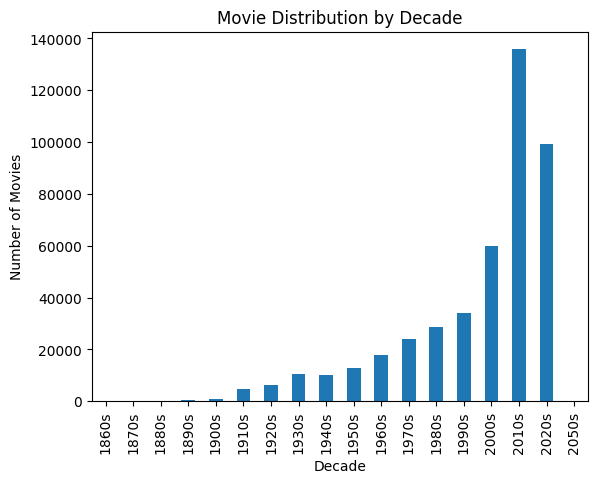

In [18]:
# Create decade column
df_released['decade'] = (df_released['release_year'] // 10) * 10
df_released['decade_label'] = df_released['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [19]:
# Subset the data to only include movies released between 1950 and 2025
df_released = df_released[(df_released['release_year'] >= 1950) & (df_released['release_year'] <= 2025)]
df_released.sort_values(by='release_year', ascending=False).head()

,id,title,release_date,overview,genres,original_language,keywords,popularity,status,adult,poster_path,release_year,decade,decade_label
251773,1487282,"Thief Club in: ""All Fun and Games""",2025-05-17,"A group of young thieves, the aptly named Thie...","Comedy, Crime",en,"diamond, thief, campy",0.0071,Released,False,/7p7ei4HcGg8bfO5Ly3AAy3Fp0w9.jpg,2025,2020,2020s
251803,1487425,TNA Border Brawl,2025-05-25,“The Border Brawl” will stream live on May 25 ...,Action,en,"wrestling, tna",0.0071,Released,False,/4BD489pi9kVmDTU3vPOjvIvrUHF.jpg,2025,2020,2020s
63248,1486963,Purple Leone,2025-05-25,Purple Leone is an experimental short film exp...,Drama,en,"influence, media, identity, globalization, man...",0.6571,Released,False,/hZECLfd1Z06GuNwEO0PPDAUw180.jpg,2025,2020,2020s
251833,1487435,Th,2025-05-25,A boy (Alex) prepares for a test that he is ve...,"Thriller, Horror",en,,0.0786,Released,False,/s6OMoAnkdVzrNaHelkl9SIPwySr.jpg,2025,2020,2020s
251722,1487328,To Detective Samuel,2025-05-16,A aging detective hires a new recruit.,Drama,en,"private detective, noir",0.0286,Released,False,/7DbuwKD9sEcpMDz49A3QNysiNPt.jpg,2025,2020,2020s


Decade distribution:


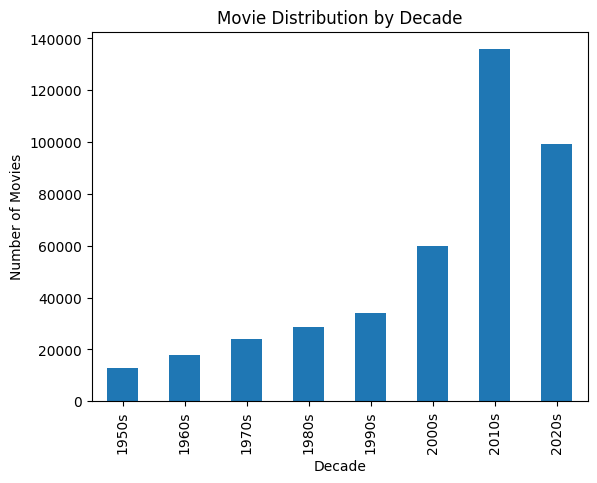

In [20]:
# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [21]:
df_released.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412546 entries, 0 to 461107
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 412546 non-null  int64         
 1   title              412546 non-null  object        
 2   release_date       412546 non-null  datetime64[ns]
 3   overview           412546 non-null  object        
 4   genres             412546 non-null  object        
 5   original_language  412546 non-null  object        
 6   keywords           412546 non-null  object        
 7   popularity         412546 non-null  float64       
 8   status             412546 non-null  object        
 9   adult              412546 non-null  bool          
 10  poster_path        412546 non-null  object        
 11  release_year       412546 non-null  int32         
 12  decade             412546 non-null  int32         
 13  decade_label       412546 non-null  object       

### Popular Movies

In [22]:
df_dates = df_released.copy()

In [23]:
# Get 5 least popular movies (lowest popularity)
low_popular = df_dates.nsmallest(5, 'popularity')[['title', 'popularity', 'release_date']]

# Get 5 most popular movies (highest popularity)
top_popular = df_dates.nlargest(5, 'popularity')[['title', 'popularity', 'release_date']]

print("10 popular Movies:")
print(low_popular)
print("\n10 Most popular Movies:")
print(top_popular)

10 popular Movies:
                                                    title  popularity  \
121062                                The Good Influencer         0.0   
138509                                       A Love Story         0.0   
151885  Peter Griffin Seeks Fitness Advice from Meowscles         0.0   
152724                                           The Pool         0.0   
155318                                       Frozen Pines         0.0   

       release_date  
121062   2021-01-01  
138509   2022-04-04  
151885   2023-12-03  
152724   2023-09-08  
155318   2019-10-31  

10 Most popular Movies:
                  title  popularity release_date
3871        Blue Beetle    2994.357   2023-08-16
5050       Gran Turismo    2680.593   2023-08-09
7920         The Nun II    1692.778   2023-09-06
2131  Meg 2: The Trench    1567.273   2023-08-02
9959        Retribution    1547.220   2023-08-23


In [24]:
df_dates = df_dates[df_dates['popularity'] > 5].sort_values('popularity', ascending = False)
df_dates.tail(10)

,id,title,release_date,overview,genres,original_language,keywords,popularity,status,adult,poster_path,release_year,decade,decade_label
202936,755143,Chivalrous,2020-08-20,"During the Northern Song Dynasty, the valuable...",Drama,zh,,5.002,Released,False,/js1knOiyvXUtEtwh6iLug9O5LFW.jpg,2020,2020,2020s
65252,17342,Night Train,2007-12-25,Wu Hongyan is a female bailiff in a regional c...,Drama,zh,neo-noir,5.002,Released,False,/iJGvDuYppSbdvjKL7UzEiOe93sz.jpg,2007,2000,2000s
65835,112219,Where's Officer Tuba?,1986-03-20,Tuba is a fainthearted cop who prefers to play...,"Comedy, Horror",cn,,5.002,Released,False,/mfHwZdnUAqSCrS7ByTga4KQLoLx.jpg,1986,1980,1980s
21302,53218,An Occurrence at Owl Creek Bridge,1961-12-14,A southerner in the American Civil War is abou...,"Drama, Fantasy",fr,"civil war, execution, fantasy sequence, based ...",5.002,Released,False,/5sxSZCNtG57ahBlXKkfB43e4bMe.jpg,1961,1960,1960s
47872,24917,Toxic Skies,2008-11-12,A doctor must find a cure for a viral epidemic...,"Action, Adventure, Drama, Science Fiction, Thr...",en,"pollution, small community",5.001,Released,False,/9QWTbgNrKeuPqBgOjRvyAhjY6Ol.jpg,2008,2000,2000s
20574,18530,The Cry of the Owl,2009-02-07,"Fleeing New York City, a failed marriage and a...",Drama,en,"depression, new york city, based on novel or b...",5.001,Released,False,/h9VizOOadBJixcbpswSqM0bb30c.jpg,2009,2000,2000s
19222,46728,The Race,2002-03-27,"Sami, Tacchini, Yaya and Kader are four small-...","Action, Comedy, Drama, Family",fr,,5.001,Released,False,/fgZB5zem3lVFvGOZBWEHZtD8KHv.jpg,2002,2000,2000s
44933,76764,Who?,1974-04-18,After an American scientist is severely injure...,"Mystery, Thriller, Science Fiction, Drama",en,cyborg,5.001,Released,False,/5COApMItosxI5OHrBXE0VlPvxhU.jpg,1974,1970,1970s
25983,273059,Starving in Suburbia,2014-04-26,When seventeen-year-old Hannah stumbles upon a...,"Drama, TV Movie",en,woman director,5.001,Released,False,/kSTqlLJ0gNEIQVNwVe9YhvAcdZo.jpg,2014,2010,2010s
90160,81840,Orgasm Torture in Satan's Rape Clinic,2004-09-28,Satanists murder the owner of an experimental ...,Horror,en,"bondage, satanist, torture, lesbian sex, softcore",5.001,Released,False,/ey856YwGRcgXebn91IwYiTC1LMt.jpg,2004,2000,2000s


In [25]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33410 entries, 3871 to 90160
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 33410 non-null  int64         
 1   title              33410 non-null  object        
 2   release_date       33410 non-null  datetime64[ns]
 3   overview           33410 non-null  object        
 4   genres             33410 non-null  object        
 5   original_language  33410 non-null  object        
 6   keywords           33410 non-null  object        
 7   popularity         33410 non-null  float64       
 8   status             33410 non-null  object        
 9   adult              33410 non-null  bool          
 10  poster_path        33410 non-null  object        
 11  release_year       33410 non-null  int32         
 12  decade             33410 non-null  int32         
 13  decade_label       33410 non-null  object        
dtypes: bool(

In [26]:
median_pop = df_dates['popularity'].median()
median_pop

np.float64(9.196)

### Subsetting for English Movies

In [27]:
# Checkpoint
df_pop = df_dates.copy()

In [28]:
# Check what status values exist
print("Available Languages:")
print(df_pop['original_language'].value_counts())

Available Languages:
original_language
en    20956
fr     2283
ja     2034
it     1391
ko     1181
      ...  
am        1
iu        1
bm        1
gu        1
cy        1
Name: count, Length: 80, dtype: int64


In [29]:
# Then filter
df_pop = df_pop[df_pop['original_language'] == 'en'].reset_index(drop=True)

# Check after filtering
print("Available AFter filtering")
df_pop[['original_language']].value_counts()

Available AFter filtering


original_language
en                   20956
Name: count, dtype: int64

### Column Extraction


In [30]:
# Create df2
df2 = df_pop[['id', 'title', 'overview', 'genres', 'keywords', 'decade_label', 'release_year', 'poster_path']].copy()

In [31]:
df2.head()

,id,title,overview,genres,keywords,decade_label,release_year,poster_path
0,565770,Blue Beetle,Recent college grad Jaime Reyes returns home f...,"Action, Science Fiction, Adventure","armor, superhero, family relationships, family...",2020s,2023,/mXLOHHc1Zeuwsl4xYKjKh2280oL.jpg
1,980489,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,"Action, Drama, Adventure","based on true story, racing, based on video ga...",2020s,2023,/51tqzRtKMMZEYUpSYkrUE7v9ehm.jpg
2,968051,The Nun II,"In 1956 France, a priest is violently murdered...","Horror, Mystery, Thriller","france, bullying, sequel, religion, demon, got...",2020s,2023,/c9kVD7W8CT5xe4O3hQ7bFWwk68U.jpg
3,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,"Action, Science Fiction, Horror","based on novel or book, sequel, shark, kaiju, ...",2020s,2023,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg
4,762430,Retribution,When a mysterious caller puts a bomb under his...,"Action, Mystery, Thriller, Crime","assassination, bomb, remake, divorce, duringcr...",2020s,2023,/oUmmY7QWWn7OhKlcPOnirHJpP1F.jpg


## Preprocessing Steps

### Stemming "Overview" Column

In [32]:
from nltk.stem.porter import PorterStemmer
import re

# Initialize stemmer
ps = PorterStemmer()

def clean_and_stem_overview(text):
    """
    Clean and stem the overview text
    """
    # Remove years (optional - you can keep if you want temporal context)
    text = re.sub(r'\b(19[0-9]{2}|20[0-9]{2})\b', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (optional)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Split into words and stem each word
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join back into a single string
    return ' '.join(stemmed_words)

In [33]:
# Apply to overview column
df2['overview_stemmed'] = df2['overview'].apply(clean_and_stem_overview)

# Preview the new column
df2['overview_stemmed'].head()

0    recent colleg grad jaim rey return home full o...
1    the ultim wishfulfil tale of a teenag gran tur...
2    in franc a priest is violent murder and sister...
3    an exploratori dive into the deepest depth of ...
4    when a mysteri caller put a bomb under hi car ...
Name: overview_stemmed, dtype: object

### Preprocessig for other text columns

In [34]:
def clean_text(text):
    """
    Convert text to lowercase and strip whitespace
    """
    if pd.isna(text):
        return ""
    
    return str(text).lower().strip()

In [35]:
# Define text columns to clean
text_columns = ['genres', 'keywords']

# Apply cleaning function to all text columns
for col in text_columns:
    df2[col] = df2[col].apply(clean_text)

# Preview cleaned data
print(df2[text_columns].head())

                               genres  \
0  action, science fiction, adventure   
1            action, drama, adventure   
2           horror, mystery, thriller   
3     action, science fiction, horror   
4    action, mystery, thriller, crime   

                                            keywords  
0  armor, superhero, family relationships, family...  
1  based on true story, racing, based on video ga...  
2  france, bullying, sequel, religion, demon, got...  
3  based on novel or book, sequel, shark, kaiju, ...  
4  assassination, bomb, remake, divorce, duringcr...  


### Creating the Soup

In [36]:
df2['soup'] = df2['genres'] + ' ' + df2['keywords'] + ' ' + df2['overview_stemmed'] + ' ' + df2['decade_label']
df2['soup'].head()

0    action, science fiction, adventure armor, supe...
1    action, drama, adventure based on true story, ...
2    horror, mystery, thriller france, bullying, se...
3    action, science fiction, horror based on novel...
4    action, mystery, thriller, crime assassination...
Name: soup, dtype: object

In [37]:
df2['soup'].iloc[0]

'action, science fiction, adventure armor, superhero, family relationships, family, high tech, job hunting, mexican american, aftercreditsstinger, duringcreditsstinger, immigrant family, college graduate, dc extended universe (dceu), alien technology, brother sister relationship, latino recent colleg grad jaim rey return home full of aspir for hi futur onli to find that home is not quit as he left it as he search to find hi purpos in the world fate interven when jaim unexpectedli find himself in possess of an ancient relic of alien biotechnolog the scarab 2020s'

## Modelling

### Vectorization Steps

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    min_df=10,      
    max_df=0.6,       # drop terms in ≥75% of the movies
    max_features=15000,             # Keep top 15,000 features
    ngram_range=(1, 2),            # Use unigrams and bigrams
)

X_tfidf = tfidf.fit_transform(df2['soup'].fillna(''))

In [39]:
X_tfidf.shape

(20956, 12513)

In [40]:
print(tfidf.get_feature_names_out()[:150])  # See what words are being used

['10' '10 year' '100' '100 year' '1000' '10000' '10th' '10th century'
 '10yearold' '11' '11th' '11yearold' '12' '12 year' '12th' '12th century'
 '12yearold' '13' '13 year' '13th' '13yearold' '14' '1453' '14th'
 '14th century' '14yearold' '15' '15 year' '15th' '15th century'
 '15yearold' '16' '16th' '16th century' '16yearold' '16yearold girl' '17'
 '17 year' '17th' '17th centuri' '17th century' '17yearold' '18' '1800'
 '1870' '1890' '18th' '18th birthday' '18th centuri' '18th century'
 '18yearold' '19' '1900s' '1910s' '1920' '1920s' '1930' '1930s' '1940'
 '1940s' '1940s 1950s' '1950' '1950s' '1950s 1960s' '1960' '1960s' '1970'
 '1970s' '1970s based' '1970s biography' '1980' '1980s' '1990' '1990s'
 '19th' '19th centuri' '19th century' '19thcenturi' '19yearold' '1st'
 '1st century' '20' '20 year' '200' '2000s' '2001' '2010s' '2020s' '2030s'
 '2040s' '20th' '20th centuri' '21' '21st' '21st centuri' '22' '23' '24'
 '24 hour' '24hour' '25' '25 year' '26' '28' '30' '30 year' '300' '30th'
 '35

In [41]:
#Construct a reverse map of indices and movie titles
df2 = df2.reset_index(drop=True)
df2['title_lower'] = df2['title'].str.lower().str.strip()
indices = pd.Series(df2['id'].values, index=df2['title_lower']).drop_duplicates()

In [42]:
indices.head()

title_lower
blue beetle          565770
gran turismo         980489
the nun ii           968051
meg 2: the trench    615656
retribution          762430
dtype: int64

### Model Function Creation

In [43]:
from sklearn.neighbors import NearestNeighbors
import difflib

# 1. Fit the NearestNeighbors model (do this once)
#    We ask for 11 neighbours: movie itself + 10 closest others
nn = NearestNeighbors(
    n_neighbors=11,
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
nn.fit(X_tfidf)   # X_tfidf is your TF–IDF sparse matrix

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [44]:
def get_recommendations(movie_title, nn_model=nn, tfidf_matrix=X_tfidf, df=df2, indices=indices, min_similarity=0.6):
    """
    Get 10 movie recommendations based on a movie title.
    
    Parameters:
    - movie_title: String, the title of the movie to find recommendations for
    - nn_model: Fitted NearestNeighbors model
    - tfidf_matrix: TF-IDF matrix used for training
    - df: DataFrame containing movie data
    - indices: Series mapping movie titles to IDs
    - min_similarity: Minimum similarity threshold for auto-correction
    
    Returns:
    - List of 10 recommended movie titles
    """
    # Normalize the input title
    key = movie_title.lower().strip()
    
    # Check if the title exists in our index
    if key not in indices.index:
        # Try to auto-correct using difflib
        close_matches = difflib.get_close_matches(key, indices.index, n=1, cutoff=min_similarity)
        
        if close_matches:
            corrected_key = close_matches[0]
            corrected_movie_id = indices[[corrected_key]].iloc[0]
            
            # Get the corrected movie title
            corrected_title = df[df['id'] == corrected_movie_id]['title'].iloc[0]
            print(f"Title '{movie_title}' not found. Using closest match: '{corrected_title}'")
            
            key = corrected_key
        else:
            raise KeyError(f"Movie title '{movie_title}' not found and no close match available.")
    
    # Get the movie ID for the title
    movie_id = indices[[key]].iloc[0]
    
    # Find the row index in the DataFrame
    movie_row = df[df['id'] == movie_id]
    if len(movie_row) == 0:
        raise KeyError(f"Movie with ID {movie_id} not found in DataFrame.")
    
    row_idx = movie_row.index[0]
    
    # Get the TF-IDF vector for this movie
    movie_vector = tfidf_matrix[row_idx]
    
    # Find the 11 nearest neighbors (including the movie itself)
    distances, neighbor_indices = nn_model.kneighbors(movie_vector, return_distance=True)
    
    # Remove the first neighbor (it's the movie itself) and get the next 10
    recommended_indices = neighbor_indices[0][1:11]  # Get indices 1-10
    
    # Get the recommended movie titles
    recommended_movies = df.iloc[recommended_indices]['title'].tolist()
    
    return recommended_movies

In [45]:
# Example usage
get_recommendations("The Dark Knight")

['Batman',
 'The Dark Knight Rises',
 'The Enforcer',
 'Batman Forever',
 'The Batman',
 'Batman: Under the Red Hood',
 'Batman: The Long Halloween, Part One',
 'Batman Begins',
 'Batman: The Long Halloween, Part Two',
 'Batman: Mask of the Phantasm']

## Saving Datasets as Pickle Files

In [46]:
df3 = df2[['id', 'title','overview', 'genres', 'release_year', 'title_lower', 'poster_path']]
df3.head()

,id,title,overview,genres,release_year,title_lower,poster_path
0,565770,Blue Beetle,Recent college grad Jaime Reyes returns home f...,"action, science fiction, adventure",2023,blue beetle,/mXLOHHc1Zeuwsl4xYKjKh2280oL.jpg
1,980489,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,"action, drama, adventure",2023,gran turismo,/51tqzRtKMMZEYUpSYkrUE7v9ehm.jpg
2,968051,The Nun II,"In 1956 France, a priest is violently murdered...","horror, mystery, thriller",2023,the nun ii,/c9kVD7W8CT5xe4O3hQ7bFWwk68U.jpg
3,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,"action, science fiction, horror",2023,meg 2: the trench,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg
4,762430,Retribution,When a mysterious caller puts a bomb under his...,"action, mystery, thriller, crime",2023,retribution,/oUmmY7QWWn7OhKlcPOnirHJpP1F.jpg


In [47]:
# Save/Update files as pickle files
# The Dataframe
import pickle

with open('Pkled Files/dataframe.pkl', 'wb') as f:
    pickle.dump(df3, f)

In [48]:
# The Indices
with open('Pkled Files/indices.pkl', 'wb') as f:
    pickle.dump(indices, f)

In [49]:
# The Tfidf Matrix
with open('Pkled Files/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)